In [323]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
# %matplotlib inline

from sklearn.datasets import load_boston

In [324]:
boston = load_boston()

## Задание. Реализация функции forward
Реализуйте функцию `forward_pass(X, w)` для одного нейрона нейронной сети с активацией ``sigmoid``. Используйте библиотеку PyTorch

<img src='https://radioprog.ru/uploads/media/articles/0001/05/267ad35a9e64a7b92c2e3b94940f686816ea6bf8.jpeg'>

In [26]:
X = torch.randn(10, 5)
X

tensor([[-1.4821, -0.2048, -1.6399, -0.1251, -0.9498],
        [ 0.9181, -0.4202,  0.0055,  0.2213, -0.4224],
        [-1.3917,  0.3433,  0.5768, -0.9773,  0.5585],
        [ 0.8618,  0.9989, -0.2410, -0.5178,  0.0080],
        [ 1.0398,  0.5916,  0.1824,  0.1117, -0.4617],
        [-1.0756, -1.2728,  1.7267, -0.1553,  1.6680],
        [ 0.1277,  0.2221, -0.7187,  0.6119, -0.0464],
        [ 1.3708, -0.1892, -1.3305,  0.5563, -0.4192],
        [ 0.2003, -2.6567, -0.5676,  0.0163, -0.6296],
        [ 0.3757,  0.6775, -1.4609,  0.2220,  0.1984]])

In [27]:
w = torch.randn(5, 1)
w

tensor([[ 0.5547],
        [ 0.0178],
        [ 1.3815],
        [-1.7969],
        [ 0.5252]])

In [31]:
def forward_pass(X, w):
    logit = X @ w
    y = torch.sigmoid(logit)
    return y

In [32]:
forward_pass(X, w)

tensor([[0.0334],
        [0.4725],
        [0.8890],
        [0.7498],
        [0.5978],
        [0.9489],
        [0.1149],
        [0.0911],
        [0.2535],
        [0.1098]])

## Задание. Реализуйте обучение в линейной регрессии
Разберем пример: применим линейную регрессию цен на жилье в Бостоне.

In [43]:
boston.data[:5, ]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

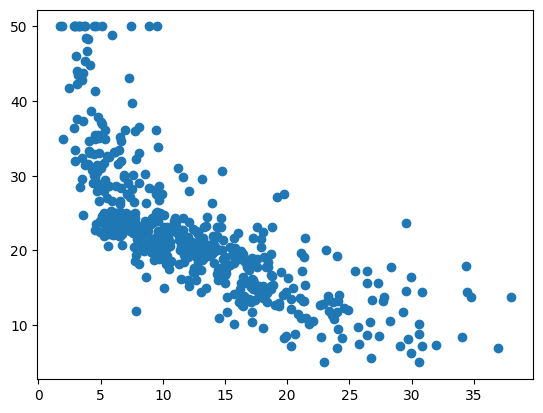

In [36]:
plt.scatter(boston.data[:, -1], boston.target)

#### Реализация без PyTorch

In [294]:
w = np.ones((14, 1))
X = boston.data
y = boston.target

In [295]:
X = (X - X.mean(axis=0)) / X.std(axis=0)
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = y.reshape(y.shape[0], 1)

In [296]:
print(X.shape)
print(w.shape)
print(y.shape)

(506, 14)
(14, 1)
(506, 1)


In [297]:
eta = 1.e-2

mse:  23.06619294549287


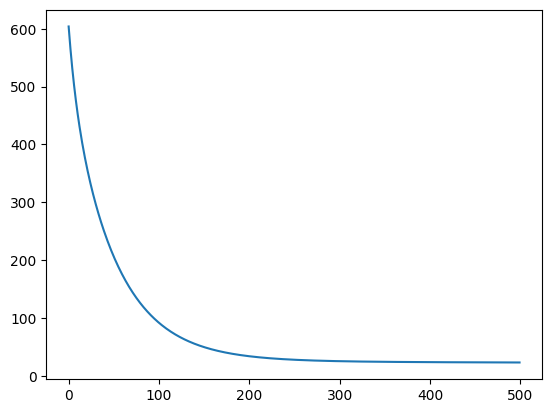

In [298]:
def linear_gradient_descent(X, y, w, eta=0.1, max_iter=10):
    mse_hist = []
    for _ in range(max_iter):
        # предскажем значение целевой переменной
        y_pred = np.dot(X, w)
        # найдем значение функции потерь
        mse = np.mean((y - y_pred)**2)
        mse_hist.append(mse)
        # найдем градиент
        delta_w =  np.dot(X.T, (np.dot(X, w)-y)) / len(X)
        # обновим значения весов
        w -= eta * delta_w
    return y_pred, mse_hist

# зададим константные значения весов
y_pred, mse_hist = linear_gradient_descent(X, y, w, eta, max_iter=500)
print('mse: ', mse_hist[-1])
plt.plot(mse_hist)
plt.show()

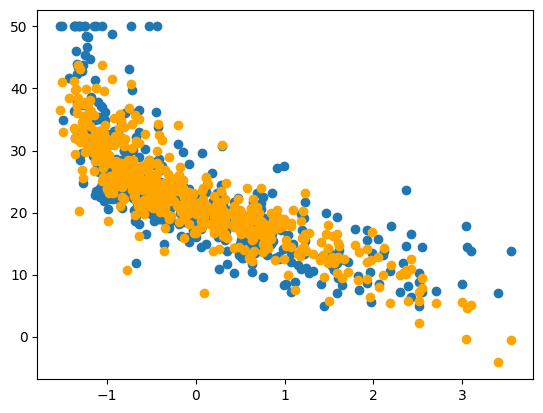

In [299]:
plt.scatter(X[:, -1], y)
plt.scatter(X[:, -1], y_pred, color='orange', linewidth=1)
plt.show()

#### Реализация на PyTorch

In [387]:
w = torch.zeros((14,1), requires_grad=True)
X = torch.tensor(boston.data[:], dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)
y = y.unsqueeze(1)

In [388]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [389]:
X = torch.concatenate((torch.ones((X.shape[0], 1)),X), dim=1)

In [390]:
print(X.shape)
print(w.shape)
print(y.shape)

torch.Size([506, 14])
torch.Size([14, 1])
torch.Size([506, 1])


In [391]:
y_pred = X @ w
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

In [392]:
print("dL/dw = \n", w.grad)

dL/dw = 
 tensor([[-45.0656],
        [  7.1284],
        [ -6.6170],
        [  8.8802],
        [ -3.2174],
        [  7.8447],
        [-12.7653],
        [  6.9201],
        [ -4.5882],
        [  7.0058],
        [  8.6013],
        [  9.3219],
        [ -6.1216],
        [ 13.5419]])


In [393]:
eta = 1.e-1

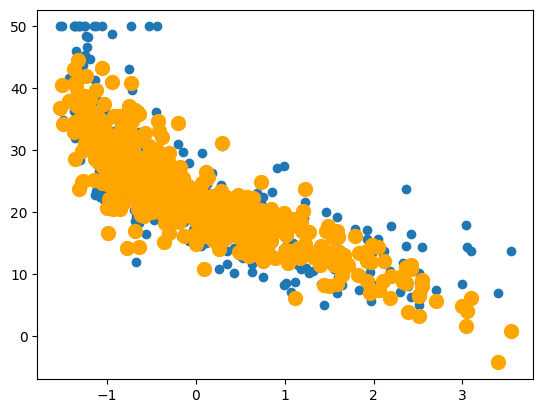

loss =  21.898539


In [394]:
for i in range(250):
    if i > 200:
        eta = 1.e-2

    y_pred = X @ w

    # Вычисляем функцию ошибок
    loss = torch.mean((y_pred - y)**2)

    # Вычисляем градиенты
    loss.backward()

    # Делаем шаг градиентного спуска по матрице весов
    w.data -= eta*w.grad.data

    # обнуляем градиенты
    w.grad.data.zero_()

    clear_output(True)
    plt.scatter(X[:, -1].data.numpy(), y.data.numpy())
    plt.scatter(X[:, -1].data.numpy(), y_pred.data.numpy(),
                color='orange', linewidth=5)
    plt.show()

    print("loss = ", loss.data.numpy())
    if loss.data.numpy() < 0.5:
        print("Done!")
        break

## Простейшая нейронная сеть

#### Загрузим данные

In [420]:
from torchvision.datasets import MNIST
import torchvision.transforms as T

In [422]:
data_transforms = T.Compose([
  T.ToTensor(),
  T.Normalize((0.5), (0.5))
])

In [423]:
root = './'
train = MNIST(root, train=True,  transform=data_transforms, download=True)
test  = MNIST(root, train=False, transform=data_transforms, download=True)

100%|██████████| 9912422/9912422 [00:01<00:00, 7834159.34it/s] 


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 25496883.57it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 7139537.41it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7608038.65it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [424]:
print(f'Data size:\n\t train {len(train)},\n\t test {len(test)}')
print(f'Data shape:\n\t features {train[0][0].shape},\n\t target {type(test[0][1])}')

Data size:
	 train 60000,
	 test 10000
Data shape:
	 features torch.Size([1, 28, 28]),
	 target <class 'int'>


#### Реализуем Dataloader

In [438]:
from torch.utils.data import DataLoader
from tqdm import tqdm

In [442]:
batch_size = 128

train_loader = DataLoader(train, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, drop_last=True)

In [443]:
# количество батчей
len(train_loader)

468

In [427]:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

#### Зададим параметры сети

In [447]:
# Размер картинки: 28 x 28, итого 784 пикселей со значением 0 или 1
features = 784

# 10 цифр: 1, 2, ... 10
classes = 10

In [454]:
W = torch.FloatTensor(features, classes).uniform_(-1, 1) / features ** 0.5
W.requires_grad_()

tensor([[-0.0282,  0.0169,  0.0142,  ...,  0.0072, -0.0063, -0.0158],
        [ 0.0313,  0.0233, -0.0205,  ..., -0.0217, -0.0262,  0.0081],
        [-0.0021,  0.0347,  0.0119,  ..., -0.0100,  0.0131, -0.0157],
        ...,
        [-0.0197,  0.0195, -0.0273,  ...,  0.0223, -0.0294,  0.0027],
        [ 0.0194,  0.0088, -0.0090,  ...,  0.0269,  0.0286, -0.0064],
        [ 0.0050, -0.0101, -0.0283,  ...,  0.0158, -0.0261,  0.0241]],
       requires_grad=True)

In [455]:
# 784 строки, соответствующих каждому пикселю и 10 колонок, заполненных весами для каждой цифры
W.shape

torch.Size([784, 10])

In [456]:
epochs = 7
lr=1e-2
history = []

**АРХИТЕКТУРА СЕТИ**
- один скрытый слой с 1 нейроном
- функция активации: softmax
- loss: cross entropy

In [457]:
for i in tqdm(range(epochs)):
  for x_batch, y_batch in train_loader:

    # загружаем батч данных (вытянутый в линию)
    x_batch = x_batch.reshape(x_batch.shape[0], -1)

    # предскажем вероятности для каждого класса (цифры)
    # найдем значения функции линейной регрессии, чтобы получить шансы, аналогично логистической регрессии
    logits = x_batch @ W

    # выполним логит преобразование шансов с помощью softmax, чтобы получить вероятности
    probabilities = torch.exp(logits) / torch.exp(logits).sum(dim=1, keepdims=True)

    # вычисляем функцию потерь (log loss, также известная как кросс-энтропия)
    # probabilities[range(batch_size), y_batch]) выбираем вероятности для истинного класса
    loss = -torch.log(probabilities[range(batch_size), y_batch]).mean()
    # сохраним полученные значения
    history.append(loss.item())

    # вычисляем градиенты
    loss.backward()

    # делаем шаг градиентного спуска
    grad = W.grad
    with torch.no_grad():
      W -= lr * grad
    # обнулим значения градиентов
    W.grad.zero_()

  print(f'{i+1},\t loss: {history[-1]}')

 14%|█▍        | 1/7 [00:13<01:20, 13.43s/it]

1,	 loss: 0.19493389129638672


 29%|██▊       | 2/7 [00:27<01:08, 13.69s/it]

2,	 loss: 0.139077290892601


 43%|████▎     | 3/7 [00:43<00:59, 15.00s/it]

3,	 loss: 0.11882150173187256


 57%|█████▋    | 4/7 [00:57<00:43, 14.50s/it]

4,	 loss: 0.10798230022192001


 71%|███████▏  | 5/7 [01:10<00:27, 13.90s/it]

5,	 loss: 0.10104377567768097


 86%|████████▌ | 6/7 [01:22<00:13, 13.44s/it]

6,	 loss: 0.09611936658620834


100%|██████████| 7/7 [01:35<00:00, 13.70s/it]

7,	 loss: 0.09238506853580475


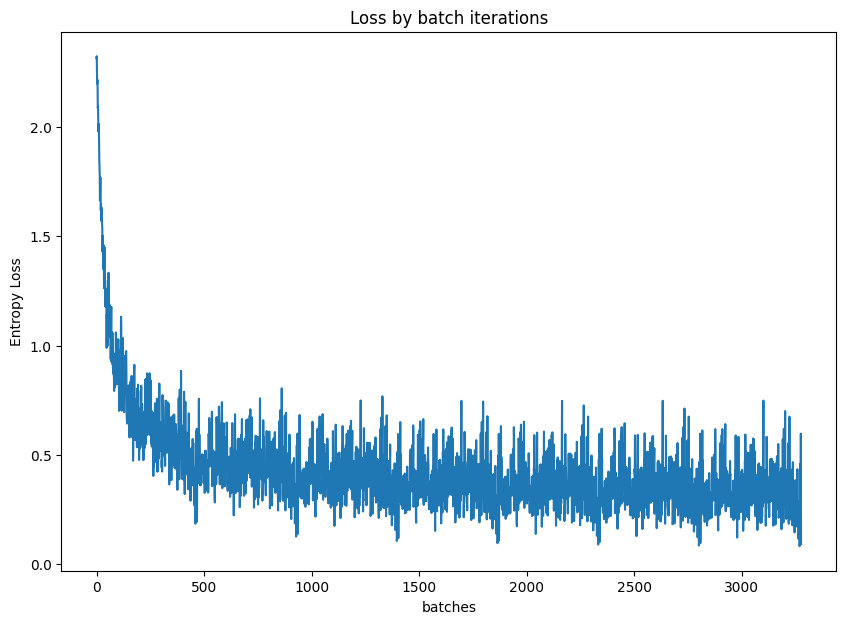

In [458]:
plt.figure(figsize=(10, 7))
plt.plot(history)
plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')
plt.show()

In [459]:
# проверим точность предсказания на тестовой выборке
acc = 0
batches = 0

for x_batch, y_batch in test_loader:
    # загружаем батч данных (вытянутый в линию)
    batches += 1
    x_batch = x_batch.view(x_batch.shape[0], -1)
    y_batch = y_batch

    # Предскажем вероятность класса, использовав полученные веса
    # и выбрав id класса с наибольшей вероятностью. Ниже пример argmax
    # dim это аналог axis
    preds = torch.argmax(x_batch @ W, dim=1)
    # найдем точность
    acc += (preds==y_batch).cpu().numpy().mean()

print(f'Test accuracy {acc / batches:.3}')

Test accuracy 0.909


### Реализуем сеть из двух скрытых слоев
**АРХИТЕКТУРА СЕТИ**
- два скрытых слоя по 32 нейрона
- функция активации первого слоя: relu
- функция активации второго слоя: softmax
- loss: cross entropy


In [466]:
features = 784
hidden = 32
classes = 10

In [480]:
w1 = torch.FloatTensor(features, hidden).uniform_(-1, 1) / features ** 0.5
w1.requires_grad_()
w2 = torch.FloatTensor(hidden, classes).uniform_(-1, 1) / features ** 0.5
w2.requires_grad_()

tensor([[-9.3584e-03,  1.3323e-02, -3.4010e-02, -8.4384e-03,  3.4631e-02,
          3.4344e-02, -1.9649e-02,  7.6556e-03, -1.7408e-02,  9.6269e-03],
        [ 1.8755e-02,  1.6347e-02,  2.6123e-02,  3.2145e-02,  5.9824e-03,
         -2.7057e-02, -5.0340e-03, -1.8530e-02, -2.5572e-02, -1.1749e-02],
        [ 1.3504e-02, -2.5369e-02,  8.9595e-03,  2.8935e-02,  2.5381e-02,
         -3.1170e-02, -1.1772e-02, -1.7432e-02,  2.6557e-02, -3.2926e-02],
        [-8.1653e-03,  2.5875e-02, -2.1084e-02, -1.1885e-02,  2.9686e-02,
         -2.9630e-02,  1.6858e-02,  1.8408e-02,  4.8671e-04, -2.1665e-02],
        [ 2.2168e-02, -2.9208e-02, -3.5394e-02, -4.6202e-03,  8.4284e-03,
         -9.9047e-03, -4.5115e-03, -2.9988e-02, -1.5638e-02,  2.4268e-03],
        [-2.1976e-02, -2.2445e-02, -1.1446e-02,  1.3394e-03, -1.9774e-02,
          2.8114e-03,  2.2129e-02, -3.5150e-02,  2.7718e-02,  1.4919e-02],
        [ 1.6653e-02,  1.9287e-02,  9.4600e-03, -2.9506e-02, -1.2372e-02,
         -2.7400e-02, -3.2618e-0

In [481]:
epochs = 7
lr=1e-2
history = []

In [496]:
for i in tqdm(range(epochs)):
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.reshape(batch_size, -1)
        out_1 = (x_batch @ w1).clamp(min=0)
        out_2 = out_1 @ w2
        y_pred = torch.exp(out_2) / torch.exp(out_2).sum(dim=1, keepdims=True)
        loss = -torch.log(y_pred[range(batch_size), y_batch]).mean()
        history.append(loss.item())

        loss.backward()

        w1_grad = w1.grad
        w2_grad = w2.grad
        with torch.no_grad():
            w1 -= lr * w1_grad
            w2 -= lr * w2_grad
        w1.grad.zero_()
        w2.grad.zero_()

    print(f'{i+1},\t loss: {history[-1]}')

 14%|█▍        | 1/7 [00:12<01:16, 12.70s/it]

1,	 loss: 0.6054866909980774


 29%|██▊       | 2/7 [00:25<01:02, 12.50s/it]

2,	 loss: 0.2011353224515915


 43%|████▎     | 3/7 [00:37<00:50, 12.59s/it]

3,	 loss: 0.14191700518131256


 57%|█████▋    | 4/7 [00:50<00:37, 12.64s/it]

4,	 loss: 0.12044919282197952


 71%|███████▏  | 5/7 [01:03<00:25, 12.93s/it]

5,	 loss: 0.10827505588531494


 86%|████████▌ | 6/7 [01:16<00:12, 12.85s/it]

6,	 loss: 0.09981026500463486


100%|██████████| 7/7 [01:30<00:00, 12.87s/it]

7,	 loss: 0.09325231611728668


In [498]:
# проверим точность предсказания на тестовой выборке
acc = 0
batches = 0

for x_batch, y_batch in test_loader:
    # загружаем батч данных (вытянутый в линию)
    batches += 1
    x_batch = x_batch.reshape(batch_size, -1)

    # Предскажем вероятность класса, использовав полученные веса
    # и выбрав id класса с наибольшей вероятностью. Ниже пример argmax
    # dim это аналог axis
    out_1 = (x_batch @ w1).clamp(min=0)
    preds = torch.argmax(out_1 @ w2, dim=1)
    # найдем точность
    acc += (preds==y_batch).cpu().numpy().mean()

print(f'Test accuracy {acc / batches:.3}')

Test accuracy 0.907


### Решение на базе PyTorch (API)

In [549]:
import torch.nn as nn
import torch.nn.functional as F

#### 3 слоя

In [550]:
features = 784
hidden = 512
classes = 10

In [554]:
w1 = torch.FloatTensor(features, hidden).uniform_(-1, 1) / features ** 0.5
w1.requires_grad_()
w2 = torch.FloatTensor(hidden, hidden).uniform_(-1, 1) / features ** 0.5
w2.requires_grad_()
w3 = torch.FloatTensor(hidden, classes).uniform_(-1, 1) / features ** 0.5
w3.requires_grad_()

tensor([[ 0.0263,  0.0170,  0.0254,  ..., -0.0259, -0.0026, -0.0130],
        [ 0.0012, -0.0329,  0.0116,  ..., -0.0087, -0.0348,  0.0059],
        [-0.0280,  0.0318,  0.0105,  ..., -0.0072, -0.0183,  0.0324],
        ...,
        [-0.0134, -0.0196,  0.0043,  ...,  0.0284,  0.0206,  0.0215],
        [-0.0230,  0.0226, -0.0303,  ..., -0.0198, -0.0257,  0.0311],
        [-0.0071, -0.0164, -0.0033,  ...,  0.0235, -0.0353,  0.0175]],
       requires_grad=True)

In [555]:
flatten = nn.Flatten()
for i in tqdm(range(epochs)):
    for x_batch, y_batch in train_loader:
        x_batch = flatten(x_batch)
        out_1 = F.relu(x_batch @ w1)
        out_2 = F.relu(out_1 @ w2)
        y_pred = out_2 @ w3
        # F.cross_entropy() не требует преобразования логитов в вероятности
        loss = F.cross_entropy(y_pred, y_batch)
        history.append(loss.item())

        loss.backward()

        w1_grad = w1.grad
        w2_grad = w2.grad
        w3_grad = w3.grad
        with torch.no_grad():
            w1 -= lr * w1_grad
            w2 -= lr * w2_grad
            w3 -= lr * w3_grad
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()

    print(f'{i+1},\t loss: {history[-1]}')

 14%|█▍        | 1/7 [00:19<01:59, 19.95s/it]

1,	 loss: 0.40883806347846985


 29%|██▊       | 2/7 [00:38<01:36, 19.26s/it]

2,	 loss: 0.1420188695192337


 43%|████▎     | 3/7 [00:59<01:19, 19.98s/it]

3,	 loss: 0.10446728765964508


 57%|█████▋    | 4/7 [01:15<00:55, 18.47s/it]

4,	 loss: 0.08987055718898773


 71%|███████▏  | 5/7 [01:32<00:35, 17.90s/it]

5,	 loss: 0.08087794482707977


 86%|████████▌ | 6/7 [01:49<00:17, 17.57s/it]

6,	 loss: 0.07422745227813721


100%|██████████| 7/7 [02:07<00:00, 18.21s/it]

7,	 loss: 0.06863876432180405


In [556]:
# проверим точность предсказания на тестовой выборке
acc = 0
batches = 0

for x_batch, y_batch in test_loader:
    batches += 1
    x_batch = flatten(x_batch)
    out_1 = F.relu(x_batch @ w1)
    out_2 = F.relu(out_1 @ w2)
    y_pred = out_2 @ w3
    preds = torch.argmax(y_pred, dim=1)
    # найдем точность
    acc += (preds==y_batch).numpy().mean()

print(f'Test accuracy {acc / batches:.3}')

Test accuracy 0.92


#### 4 слоя

In [564]:
features = 784
hidden = 1024
classes = 10

lr=1e-2

In [565]:
w1 = torch.FloatTensor(features, hidden).uniform_(-1, 1) / features ** 0.5
w1.requires_grad_()
w2 = torch.FloatTensor(hidden, hidden).uniform_(-1, 1) / features ** 0.5
w2.requires_grad_()
w3 = torch.FloatTensor(hidden, hidden).uniform_(-1, 1) / features ** 0.5
w3.requires_grad_()
w4 = torch.FloatTensor(hidden, classes).uniform_(-1, 1) / features ** 0.5
w4.requires_grad_()

tensor([[ 0.0036,  0.0013, -0.0238,  ..., -0.0208,  0.0182,  0.0345],
        [-0.0016, -0.0221,  0.0259,  ..., -0.0136,  0.0305,  0.0121],
        [ 0.0017, -0.0097, -0.0268,  ..., -0.0125, -0.0272,  0.0294],
        ...,
        [ 0.0338, -0.0334, -0.0210,  ...,  0.0169,  0.0349, -0.0180],
        [-0.0176,  0.0178, -0.0123,  ...,  0.0090, -0.0246, -0.0094],
        [ 0.0096, -0.0222, -0.0147,  ..., -0.0131,  0.0190,  0.0256]],
       requires_grad=True)

In [566]:
flatten = nn.Flatten()
for i in tqdm(range(epochs)):
    for x_batch, y_batch in train_loader:
        x_batch = flatten(x_batch)
        out_1 = F.relu(x_batch @ w1)
        out_2 = F.relu(out_1 @ w2)
        out_3 = F.relu(out_2 @ w3)
        y_pred = out_3 @ w4
        # F.cross_entropy() не требует преобразования логитов в вероятности
        loss = F.cross_entropy(y_pred, y_batch)
        history.append(loss.item())

        loss.backward()

        w1_grad = w1.grad
        w2_grad = w2.grad
        w3_grad = w3.grad
        w4_grad = w4.grad
        with torch.no_grad():
            w1 -= lr * w1_grad
            w2 -= lr * w2_grad
            w3 -= lr * w3_grad
            w4 -= lr * w4_grad
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        w4.grad.zero_()

    print(f'{i+1},\t loss: {history[-1]}')

 14%|█▍        | 1/7 [00:38<03:53, 38.90s/it]

1,	 loss: 0.3014327883720398


 29%|██▊       | 2/7 [01:07<02:44, 32.93s/it]

2,	 loss: 0.11694182455539703


 43%|████▎     | 3/7 [01:36<02:05, 31.29s/it]

3,	 loss: 0.093524269759655


 57%|█████▋    | 4/7 [02:01<01:25, 28.48s/it]

4,	 loss: 0.0814828872680664


 71%|███████▏  | 5/7 [02:25<00:54, 27.09s/it]

5,	 loss: 0.0715910941362381


 86%|████████▌ | 6/7 [02:49<00:25, 25.88s/it]

6,	 loss: 0.0635257437825203


100%|██████████| 7/7 [03:15<00:00, 27.90s/it]

7,	 loss: 0.056396111845970154


In [567]:
# проверим точность предсказания на тестовой выборке
acc = 0
batches = 0

for x_batch, y_batch in test_loader:
    batches += 1
    x_batch = flatten(x_batch)
    out_1 = F.relu(x_batch @ w1)
    out_2 = F.relu(out_1 @ w2)
    out_3 = F.relu(out_2 @ w3)
    y_pred = out_3 @ w4
    preds = torch.argmax(y_pred, dim=1)
    # найдем точность
    acc += (preds==y_batch).numpy().mean()

print(f'Test accuracy {acc / batches:.3}')

Test accuracy 0.929


### Решение на базе PyTorch nn.Module()

In [573]:
# Гиперпараметры
batch_size = 128
learning_rate = 1e-2
epochs = 5

In [593]:
# Определение модели
class Three_Layers_NN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Three_Layers_NN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [594]:
# Создание модели
features = 784
hidden = 512
classes = 10

model = Three_Layers_NN(features, hidden, classes)

In [595]:
# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [596]:
# Обучение модели
for epoch in range(epochs):
    for inputs, labels in train_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("Training finished!")

Epoch [1/5], Loss: 0.2712
Epoch [2/5], Loss: 0.1161
Epoch [3/5], Loss: 0.0915
Epoch [4/5], Loss: 0.0813
Epoch [5/5], Loss: 0.0746
Training finished!


In [597]:
# Оценка модели
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the {total} training images: {100 * correct / total:.2f}%')

Accuracy on the 59904 training images: 91.15%


### Решение на базе PyTorch nn.Sequential()

In [588]:
from torchsummary import summary

In [585]:
# Гиперпараметры
batch_size = 128
learning_rate = 1e-2
epochs = 5

# Параметры модели
features = 784
hidden = 512
classes = 10

In [587]:
model = nn.Sequential(
    nn.Linear(features, hidden),
    nn.ReLU(),
    nn.Linear(hidden, hidden),
    nn.ReLU(),
    nn.Linear(hidden, classes)
)

In [589]:
summary(model, (features,), batch_size=batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [128, 512]         401,920
              ReLU-2                 [128, 512]               0
            Linear-3                 [128, 512]         262,656
              ReLU-4                 [128, 512]               0
            Linear-5                  [128, 10]           5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.38
Forward/backward pass size (MB): 2.01
Params size (MB): 2.55
Estimated Total Size (MB): 4.95
----------------------------------------------------------------


In [590]:
# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [591]:
# Обучение модели
for epoch in range(epochs):
    for inputs, labels in train_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("Training finished!")

Epoch [1/5], Loss: 0.2856
Epoch [2/5], Loss: 0.1214
Epoch [3/5], Loss: 0.0940
Epoch [4/5], Loss: 0.0824
Epoch [5/5], Loss: 0.0749
Training finished!


In [592]:
# Оценка модели
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the {total} training images: {100 * correct / total:.2f}%')

Accuracy on the 59904 training images: 91.05%


### Пример нейронной сети для датасета Boston (регрессия)

In [797]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [798]:
X = boston.data
y = boston.target

In [799]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [800]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [801]:
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
Y_train = torch.tensor(Y_train, dtype=torch.float).view(-1, 1)
Y_test = torch.tensor(Y_test, dtype=torch.float).view(-1, 1)

In [802]:
train = torch.utils.data.TensorDataset(X_train, Y_train)
test = torch.utils.data.TensorDataset(X_test, Y_test)

In [803]:
batch_size = 64

train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test, batch_size=batch_size)

In [804]:
# Гиперпараметры
learning_rate = 1e-3
epochs = 1000

In [805]:
class SimpleRegressionNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleRegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [806]:
# Параметры модели
input_size = X.shape[1]
hidden_size = 32
model = SimpleRegressionNN(input_size, hidden_size)

In [807]:
# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [808]:
# Обучение модели
for epoch in range(epochs):
    for inputs, y_true in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, y_true)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("Training finished!")

Epoch [1/1000], Loss: 560.7596
Epoch [2/1000], Loss: 705.0175
Epoch [3/1000], Loss: 87.8171
Epoch [4/1000], Loss: 60.0184
Epoch [5/1000], Loss: 26.2102
Epoch [6/1000], Loss: 16.7952
Epoch [7/1000], Loss: 7.8898
Epoch [8/1000], Loss: 13.7069
Epoch [9/1000], Loss: 10.5483
Epoch [10/1000], Loss: 27.3071
Epoch [11/1000], Loss: 5.4514
Epoch [12/1000], Loss: 5.3006
Epoch [13/1000], Loss: 30.6620
Epoch [14/1000], Loss: 10.8948
Epoch [15/1000], Loss: 11.1820
Epoch [16/1000], Loss: 19.0655
Epoch [17/1000], Loss: 7.5313
Epoch [18/1000], Loss: 33.7470
Epoch [19/1000], Loss: 3.8132
Epoch [20/1000], Loss: 3.1057
Epoch [21/1000], Loss: 2.6767
Epoch [22/1000], Loss: 10.5894
Epoch [23/1000], Loss: 9.2472
Epoch [24/1000], Loss: 18.1000
Epoch [25/1000], Loss: 11.3371
Epoch [26/1000], Loss: 5.9288
Epoch [27/1000], Loss: 6.0756
Epoch [28/1000], Loss: 6.8202
Epoch [29/1000], Loss: 9.7874
Epoch [30/1000], Loss: 7.2299
Epoch [31/1000], Loss: 5.4872
Epoch [32/1000], Loss: 6.1524
Epoch [33/1000], Loss: 4.9184


In [814]:
# Оценка модели
model.eval()
total_loss = []
with torch.no_grad():
    for inputs, y_true in test_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)
        loss = criterion(outputs, y_true)
        total_loss.append(loss)
    print(np.mean(total_loss))

8.203206


In [812]:
torch.concatenate((outputs, y_true), dim=1)

tensor([[27.0487, 23.6000],
        [34.3745, 32.4000],
        [16.0684, 13.6000],
        [22.2219, 22.8000],
        [16.6314, 16.1000],
        [21.0949, 20.0000],
        [17.1440, 17.8000],
        [16.7111, 14.0000],
        [26.6903, 19.6000],
        [19.8237, 16.8000],
        [20.0873, 21.5000],
        [19.6324, 18.9000],
        [ 6.3556,  7.0000],
        [19.5233, 21.2000],
        [18.7093, 18.5000],
        [23.6794, 29.8000],
        [19.6452, 18.8000],
        [10.9465, 10.2000],
        [43.7727, 50.0000],
        [12.5762, 14.1000],
        [24.5149, 25.2000],
        [25.8077, 29.1000],
        [14.8082, 12.7000],
        [22.4626, 22.4000],
        [18.5097, 14.2000],
        [21.4146, 13.8000],
        [19.0638, 20.3000],
        [11.4314, 14.9000],
        [20.2111, 21.7000],
        [19.2539, 18.3000],
        [22.2321, 23.1000],
        [23.4616, 23.8000],
        [22.7650, 15.0000],
        [23.6445, 20.8000],
        [15.3879, 19.1000],
        [16.9047, 19